# JumpStart: Natural  Language Processing

## Prerequisite

In [4]:
import numpy as np
import math

In [5]:
import nltk

# Uncomment the following line the first time you run the code
# nltk.download('stopwords')
# nltk.download('wordnet')

# ==> uncomment these two lines only for the 1st time, for downloading

## result ##############
#[nltk_data] Downloading package stopwords to
#[nltk_data]     /Users/sangwoolee/nltk_data...
#[nltk_data]   Unzipping corpora/stopwords.zip.
#[nltk_data] Downloading package wordnet to
#[nltk_data]     /Users/sangwoolee/nltk_data...
#[nltk_data]   Package wordnet is already up-to-date!

## Load Dataset

In [6]:
import pandas as pd

# df = pd.read_csv('/Users/sangwoolee/Desktop/bootcamp/0410-01-IntroScrapy/\
# Introduction_to_Scrapy/webMD/webmd_reviews_04202239.csv')

df = pd.read_csv('./webmd_reviews_04202239.csv')

In [7]:
# type(df)
# print(df.shape)
# print(df.dtypes)  # note: object is most generic type 

In [8]:
# np.sum(df.isnull(), axis = 0)/df.shape[0]*100

In [9]:
df = df.drop(columns=['reviewer'], inplace=False) # lsw, revieer is not needed. 

In [10]:
# lsw, make sure that reviewer columns is removed
# print(df.shape)

In [11]:
df = df.dropna(subset=['NoUsefulFound','TimeOnMed','age','comment','condition',\
                            'drugname', 'easeofuse', 'effectiveness', 'gender', \
                            'satisfaction', 'whois'], axis=0, how='any')
# lsw) having no screenname is OK. 

df = df.reset_index(drop=True) # 0422 lsw added

In [12]:
print(df.shape)
print(df.dtypes)  # note: object is most generic type 
print( np.sum(df.isnull(), axis = 0)/df.shape[0]*100 )

(6342, 12)
NoUsefulFound     int64
TimeOnMed        object
age              object
comment          object
condition        object
drugname         object
easeofuse         int64
effectiveness     int64
gender           object
satisfaction      int64
screenname       object
whois            object
dtype: object
NoUsefulFound     0.000000
TimeOnMed         0.000000
age               0.000000
comment           0.000000
condition         0.000000
drugname          0.000000
easeofuse         0.000000
effectiveness     0.000000
gender            0.000000
satisfaction      0.000000
screenname       25.386313
whois             0.000000
dtype: float64


## Preprocessing

- Convert all the text to lowercase - avoids having multiple copies of the same words.
- Replace url in the text with empty space.
- Replace all empty spaces with just one.

In [13]:
import re

# Convert all the string to lower cases
df['comment'] = df['comment'].str.lower()
# \S+ means anything that is not an empty space
# df['selftext'] = df['selftext'].apply(lambda x: re.sub('http\S*', '', x))
# \s: Matches any whitespace character; 
# this is equivalent to the class [ \t\n\r\f\v].
df['comment'] = df['comment'].apply(lambda x: re.sub('\s+', ' ', x))

- Let's take a look at the dataframe after preprocessing.

In [14]:
df.sample(2)

,NoUsefulFound,TimeOnMed,age,comment,condition,drugname,easeofuse,effectiveness,gender,satisfaction,screenname,whois
3422,16,1 to less than 2 years,45-54,i have been on this med for 1 year but was put...,High Blood Pressure,atenolol oral,3,2,Female,1,Katy,Patient
1957,36,1 to 6 months,45-54,i have been taking this medication for 4 month...,High Blood Pressure,amlodipine oral,5,5,Female,5,Cshellinlodi,Patient


## Filtering

In [15]:
df['comment'] = df['comment'].apply(lambda x: re.sub('[^\w\s]', ' ', x))   
# lsw 0421, '' => changed to ' '

# here, ^ means not 

# \w: Matches any alphanumeric character; 
# this is equivalent to the class [a-zA-Z0-9_].
# \s: Matches any whitespace character; 
# this is equivalent to the class [ \t\n\r\f\v].

In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

stop = [x.lower() for x in stop]
# print(stop) # python lists 

In [19]:
"""
mystop01 = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', \
            'ourselves', 'you', 'he', 'him', 'your', 'yours', 'yourself',\
            'yourselves', 'his', 'himself', 'she', 'her', 'hers', 'herself', \
            'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', \
            'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'a', 'an', \
            'the','and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',\
            'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', \
            'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',\
            'once', 'here', 'there', 'when', 'where', 'why', 'how', 'own', 'same',\
            'than', 'just', 'now', 'ma', 'mightn', "mightn't", 's', 't', 'd', \
            'll', 'm', 'o', 're', 've', 'y']
"""
mystop_append = ['day', 'month', 'drug', 'medication', 'days', 'today', 'year', 'years',\
                'week', 'weeks']

mystop_drug = ['lisinopril', 'atenolol', 'Diovan','Bystolic', 'amlodipine'\
,'hydrochlorothiazide','Norvasc','metoprolol','succinate','Toprol']

mystop_num = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight',\
             'nine', 'ten', 'once', 'twice']

mystop_dos = ['5mg', '10mg', '15mg', '20mg', '25mg', '30mg', '35mg',\
             '40mg', '45mg', '50mg', '55mg', '60mg', '65mg', '70mg',\
             '75mg', '80mg', '85mg', '90mg', '95mg', '100mg']

mystop_t = ['year', 'month', 'day']

mystop02 = stop+mystop_append+mystop_drug+mystop_num+mystop_dos+mystop_t

In [20]:
df['comment_stop'] = df['comment'].\
apply(lambda x: " ".join(x for x in x.split() if x not in mystop02))
# apply(lambda x: " ".join(x for x in x.split() if x not in mystop02))

# remove numbers ==========================> dubug this
# df['comment_stop'] = df['comment_stop'].\
# apply(lambda x: re.sub('[0-9]+', '', x))  )

In [21]:
# lsw, this function was not satisfactory, so blocked 
# lemmatization block
"""
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

df['comment_stop2'] = df['comment_stop'].\
apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
"""

"\nfrom nltk.stem import PorterStemmer\nstemmer = PorterStemmer()\n\ndf['comment_stop2'] = df['comment_stop'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))\n"

In [22]:
# lemmatization  block 
from nltk import WordNetLemmatizer
lemztr = WordNetLemmatizer()

df['comment_stop2'] = df['comment_stop'].\
apply(lambda x: ' '.join([lemztr.lemmatize(word) for word in x.split()]))

In [23]:
# Find synonyms of symptoms. Not needed anymore. 
"""comment_stop_comb = ' '.join( df.comment_stop2 ) # a string # comb: means combined

from collections import Counter
comment_stop_wcnt = Counter(comment_stop_comb.split()) # w: words # cnt: count

df_wc = pd.DataFrame.from_dict(comment_stop_wcnt, orient='index').reset_index()
df_wc.columns = ['word', 'count']
# df = pd.DataFrame.from_dict(d, orient='index').reset_index()
df_wc=df_wc.sort_values('count',ascending=False)

df_wc.to_csv('/Users/sangwoolee/Desktop/bootcamp/0410-01-IntroScrapy/\
Introduction_to_Scrapy/webMD/wordcount_w_stop_04202144.csv')"""

"comment_stop_comb = ' '.join( df.comment_stop2 ) # a string # comb: means combined\n\nfrom collections import Counter\ncomment_stop_wcnt = Counter(comment_stop_comb.split()) # w: words # cnt: count\n\ndf_wc = pd.DataFrame.from_dict(comment_stop_wcnt, orient='index').reset_index()\ndf_wc.columns = ['word', 'count']\n# df = pd.DataFrame.from_dict(d, orient='index').reset_index()\ndf_wc=df_wc.sort_values('count',ascending=False)\n\ndf_wc.to_csv('/Users/sangwoolee/Desktop/bootcamp/0410-01-IntroScrapy/Introduction_to_Scrapy/webMD/wordcount_w_stop_04202144.csv')"

In [24]:
# A dictionary struture for sideeffects symptoms, and its synonyms

sideeffects = {}
sideeffects['cough']=['cough.*', 'cough.*', 'caoughing','caugh',\
                        'coghing', 'couth']
                      
sideeffects['pain']=\
['ache.*', 'achiness', 'achy', 'cramp.*', 'pain.*','arthritis', \
 'artrithis', 'sore', 'hurt', 'irrat.*', 'irrat.*', 'irriat.*', \
 'irritab.*', 'irritat.*', 'neuralgia', 'neuropathy', 'tender', \
 'throb', 'tight']

sideeffects['allergy']=\
['allerg.*', 'allegry', 'allereg.*', 'allgeric','anaphyl', 'anaphalytic',\
 'angiodem.*', 'h.stamine', 'asthma', 'asthyma', 'athsma', 'weezing',\
 'hive', 'itch', 'itcy', 'urticaria']

sideeffects['headache']=['head.?ness', 'headach', 'heacack', 'headace',\
                         'headahes', 'headake', 'headches', 'light headed',\
                         'lightheaded', 'headedness', 'migrane']

sideeffects['nauseavomit']=['naus.a', 'nauseuas', 'neusua', 'fainting', \
                           'vomit'] 

sideeffects['lethargy']=['tired', 'sluggish', 'exh?aust', 'faitgue', \
                         'fatigu?e', 'fatiuge', 'letharg', 'lazy',\
                        'tierd', 'tieredness', 'tirdness', 'weak', 'sleepy',\
                        'sleeping', 'sleepiness']

In [25]:
sideeffects['anxietydepress']=\
['aggetating', 'agitation', 'anxi', 'depress', 'deteriorated', 'distress',\
 'mental', 'nervous', 'nightmare', 'sweating', 'restless', 'sleepless', \
 'worrysome']

sideeffects['dizzy']=['dii?zzi', 'weakness', 'dissiness', 'diziness', \
                     'dizyness', 'dizzeness', 'dizzines', 'dizziness',\
                     'dizzneis', 'dizzness', 'dizzy', \
                      'dowsiness', 'dozziness', 'drizinesss', 'drowsy'] 
sideeffects['blur']=['blur', 'blind', 'eyesight', 'flash', 'vision', 'visual']

sideeffects['skinprob']=['flush','rash', 'blister', 'eczema', 'erythema', \
                        'lump', 'phlegm', 'rassh', '\bred\b', 'redness']                      

sideeffects['appetite']=['appetit', 'appettite', 'bulemia']

sideeffects['diarrhea']=['diah?r+ea', 'diah*rea','diahrhea', 'diareha',\
                         'diarehea', 'diareia', 'diarhea', 'diarheaa', \
                         'diarrea', 'diarreah', 'diarreha', 'diarrh', \
                         'diarrhea', 'direherra', 'dirrahea', 'dirrhea']
sideeffects['sleepdisorder']=['insomia', 'insomina', 'insomnia', \
                            'narcolep', 'narcolep', 'nightmare', \
                            'sleepless', 'sleppless']

In [26]:
sideeffects['GIsymptom']=['stomach', 'belch', 'bloat', 'blot', 'burn',\
                          '\bgas\b', 'digest', 'gastritis', 'gerd', \
                          'gut wrench', 'heartburn', 'heart burn', \
                          'gastric', 'reflex', 'reflux']
sideeffects['sweating']=['sweat', 'overheat', 'over heat'] 
                         
sideeffects['hairloss']=['bald', 'hair', 'hairloss', 'hair loss']                         

sideeffects['breathediscomf']=['breath', 'chock', 'gasp', 'shortness'] 
                         
sideeffects['mentalalteration']=['confus', 'euphoric', 'hallucinat', \
                                 'hullucinat', 'seizure']

sideeffects['abnormsense']=\
['tingle', 'tingling', '\bnumb\b', 'numbness', 'prick', 'dumbness',\
 'spasm', 'stiff', 'stinging','tickle', 'tingaling', 'tingle', \
 'tingling', 'tingly']

In [27]:
sideeffects['movedisorder']=['paralysis', 'paresthesis', 'tremor', 'twitch']

                         
sideeffects['constipation']=['constipat', 'consstipated', 'constaption']
sideeffects['sexualfunc']=['ejacul', 'erect', 'erictile','errection', \
                          'eyaculation', 'imp.ten', 'lib.do', 'sexual']
sideeffects['thirsty']=['dry', 'dry mouth', 'thirst']
sideeffects['unirate']=['urinat', 'void']                 
sideeffects['swallow']=['gag', 'hiccup', 'swallow']
sideeffects['ear']=['hear', 'tinnit','vertigo', 'vitiligo' ]
sideeffects['voicechange']=['hoarse', 'speech', 'voice']             
sideeffects['pancreatitis']=['pancreati']

In [28]:
# new version
key_list = list( sideeffects.keys() )
for row_i in range(0, df.shape[0]):
    for k_i in range(0, len(list( sideeffects.keys() ))): 
        df.loc[row_i, key_list[k_i] ] = \
        any( [ re.search(x, df.loc[row_i,'comment_stop2'])!=None for \
              x in sideeffects[key_list[k_i]] ] )

In [29]:
df['SEcount'] = df.iloc[:, 14:100].sum(axis=1)
# how many symptoms did each reviewer complain of? 

In [30]:
df.to_csv('/Users/sangwoolee/Desktop/bootcamp/0410-01-IntroScrapy/\
Introduction_to_Scrapy/webMD/webmd_review_ws_wc_04221452.csv')

## Word Cloud

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

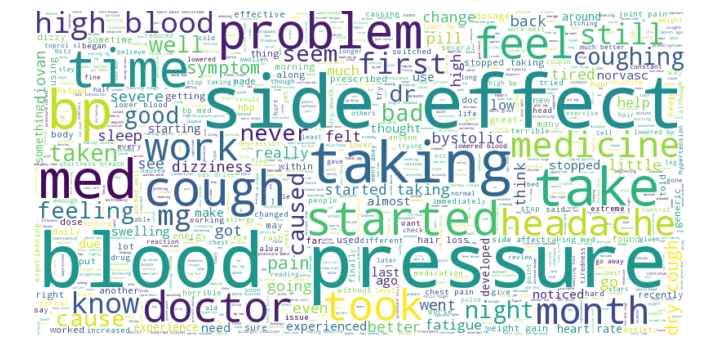

In [32]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
# wc.generate(' '.join(df['selftext']))
wc.generate(' '.join(df['comment_stop2'])) # lsw

# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

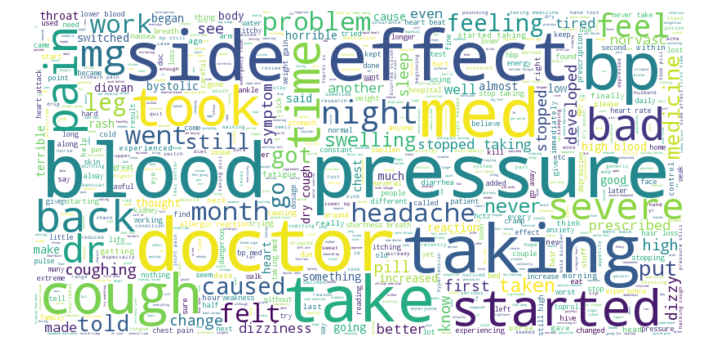

In [33]:
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
# wc.generate(' '.join(df['selftext']))

# df[df.effectiveness==1 or df.satisfaction==1,comment_s] 
wc2.generate(' '.join(df[(df.effectiveness==1) & (df.satisfaction==1)]['comment_stop2']))    

# show
plt.figure(figsize=(12, 6))
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot') # ggplot is from R

/Users/sangwoolee/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


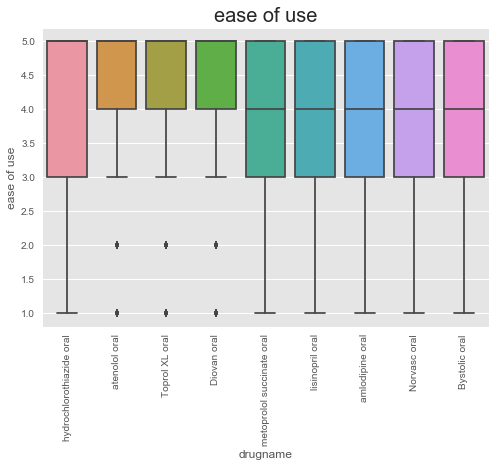

In [35]:
idx = df.groupby('drugname').median()['easeofuse'].sort_values(ascending=False).index
boxplot_=sns.boxplot(x='drugname', y='easeofuse', data=df, order=idx)
plt.setp(boxplot_.get_xticklabels(), rotation=90)

plt.xlabel('drugname')
plt.ylabel('ease of use')
plt.title('ease of use', fontsize=20)

/Users/sangwoolee/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


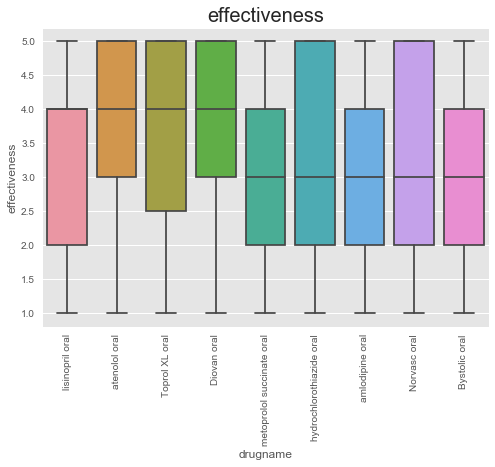

In [36]:
idx = df.groupby('drugname').median()['effectiveness'].sort_values(ascending=False).index
boxplot_=sns.boxplot(x='drugname', y='effectiveness', data=df, order=idx)
plt.setp(boxplot_.get_xticklabels(), rotation=90)

plt.xlabel('drugname')
plt.ylabel('effectiveness')
plt.title('effectiveness', fontsize=20)

/Users/sangwoolee/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


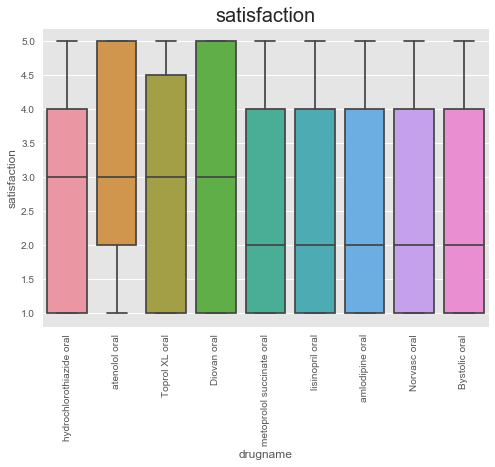

In [37]:
idx = df.groupby('drugname').median()['satisfaction'].sort_values(ascending=False).index
boxplot_=sns.boxplot(x='drugname', y='satisfaction', data=df, order=idx)
plt.setp(boxplot_.get_xticklabels(), rotation=90)

plt.xlabel('drugname')
plt.ylabel('satisfaction')
plt.title('satisfaction', fontsize=20)

In [ ]:

"""plt.hist( df[df.drugname=='lisinopril oral']['effectiveness'], bins=20)
plt.xlabel('effectiveness')
plt.ylabel('count')
plt.title('Histogram of effectiveness, lisinopril oral', fontsize=20)"""

In [ ]:

"""plt.hist( df[df.drugname=='lisinopril oral']['easeofuse'], bins=20)
plt.xlabel('easeofuse')
plt.ylabel('count')
plt.title('Histogram of easeofuse, lisinopril oral', fontsize=20)"""

In [ ]:
"""plt.hist( df[df.drugname=='lisinopril oral']['satisfaction'], bins=20)
plt.xlabel('satisfaction')
plt.ylabel('count')
plt.title('Histogram of satisfaction, lisinopril oral', fontsize=20)"""

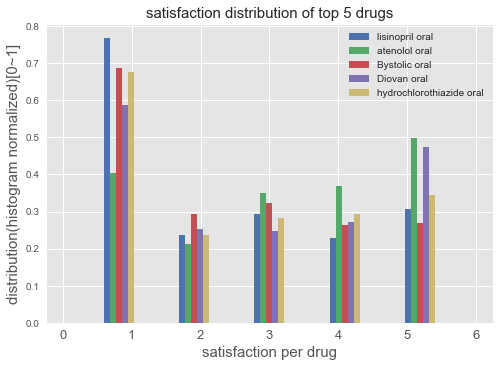

In [91]:
plt.style.use('seaborn-deep')

y1 = df[df.drugname=='lisinopril oral']['satisfaction']
y2 = df[df.drugname=='atenolol oral']['satisfaction']
y3 = df[df.drugname=='Bystolic oral']['satisfaction']
y4 = df[df.drugname=='Diovan oral']['satisfaction']
y5 = df[df.drugname=='hydrochlorothiazide oral']['satisfaction']

bins = np.linspace(0,6,12)

plt.hist([y1, y2, y3, y4, y5], bins,\
         label=['lisinopril oral', 'atenolol oral', 'Bystolic oral',\
                'Diovan oral', 'hydrochlorothiazide oral'], normed=True)


plt.legend(loc='upper right')

plt.xlabel('satisfaction per drug', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('distribution(histogram normalized)', fontsize=15)
plt.title('satisfaction distribution of top 5 drugs', fontsize=15) 

plt.show()

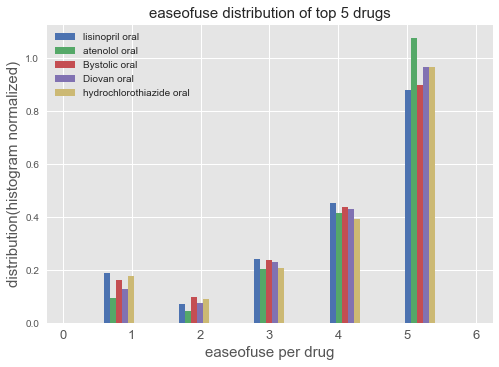

In [95]:
plt.style.use('seaborn-deep')

y1 = df[df.drugname=='lisinopril oral']['easeofuse']
y2 = df[df.drugname=='atenolol oral']['easeofuse']
y3 = df[df.drugname=='Bystolic oral']['easeofuse']
y4 = df[df.drugname=='Diovan oral']['easeofuse']
y5 = df[df.drugname=='hydrochlorothiazide oral']['easeofuse']

bins = np.linspace(0,6,12)

plt.hist([y1, y2, y3, y4, y5], bins,\
         label=['lisinopril oral', 'atenolol oral', 'Bystolic oral',\
                'Diovan oral', 'hydrochlorothiazide oral'], normed=True)


plt.legend(loc='upper left')

plt.xlabel('easeofuse per drug', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('distribution(histogram normalized)', fontsize=15)
plt.title('easeofuse distribution of top 5 drugs', fontsize=15) 

plt.show()

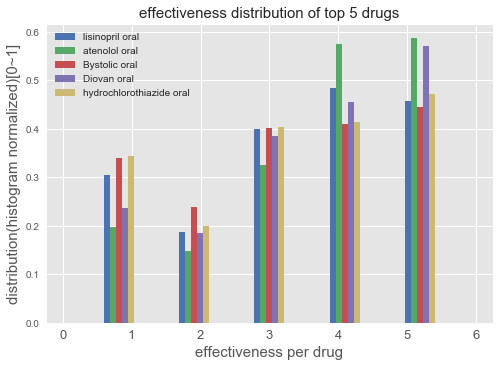

In [94]:
plt.style.use('seaborn-deep')

y1 = df[df.drugname=='lisinopril oral']['effectiveness']
y2 = df[df.drugname=='atenolol oral']['effectiveness']
y3 = df[df.drugname=='Bystolic oral']['effectiveness']
y4 = df[df.drugname=='Diovan oral']['effectiveness']
y5 = df[df.drugname=='hydrochlorothiazide oral']['effectiveness']

bins = np.linspace(0,6,12)

plt.hist([y1, y2, y3, y4, y5], bins,\
         label=['lisinopril oral', 'atenolol oral', 'Bystolic oral',\
                'Diovan oral', 'hydrochlorothiazide oral'], normed=True)


plt.legend(loc='upper left')

plt.xlabel('effectiveness per drug', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('distribution(histogram normalized)', fontsize=15)
plt.title('effectiveness distribution of top 5 drugs', fontsize=15) 

plt.show()

In [ ]:
"""(df.groupby('drugname')['cough'].sum()/df.groupby('drugname')['cough'].count()*100).plot.bar(color='b')
plt.xlabel('drugs')
plt.ylabel('% of reviewers with cough sideeffects')
plt.title('drug vs. % of reviewers with cough sideeffects', fontsize=15)"""

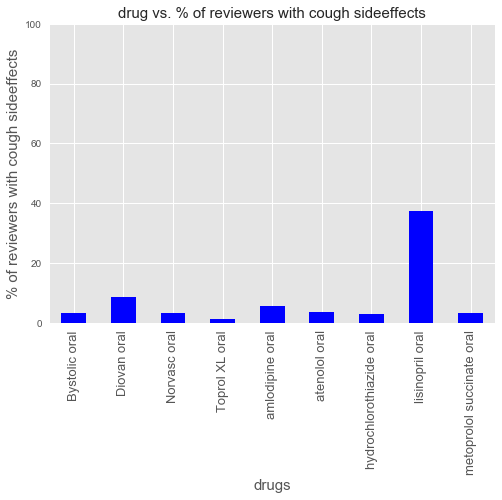

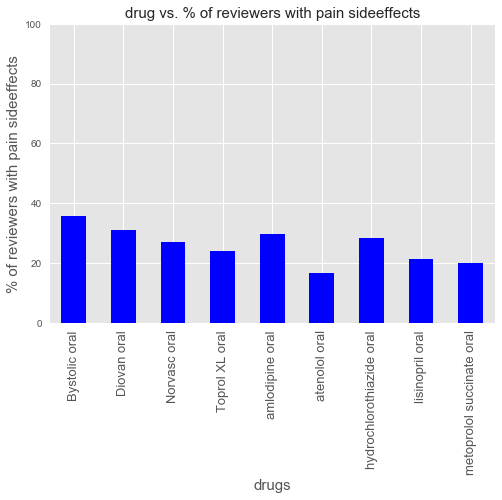

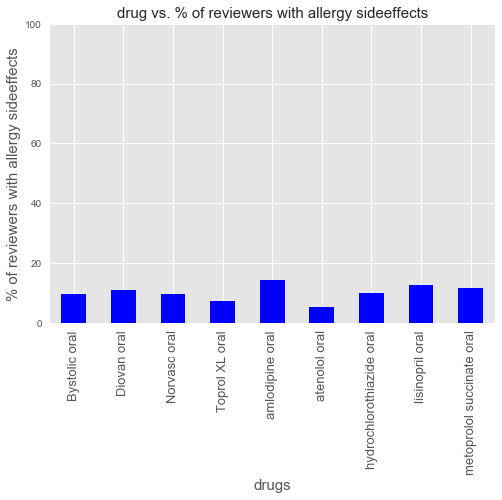

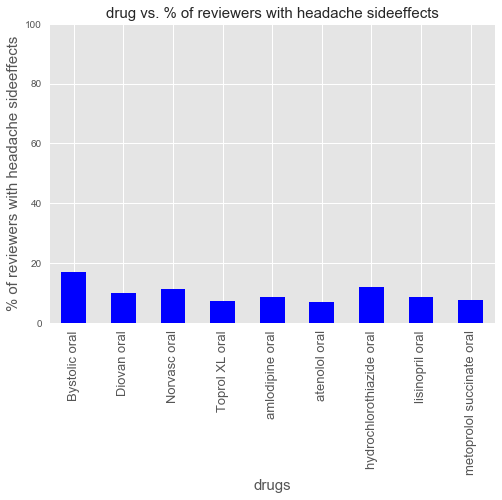

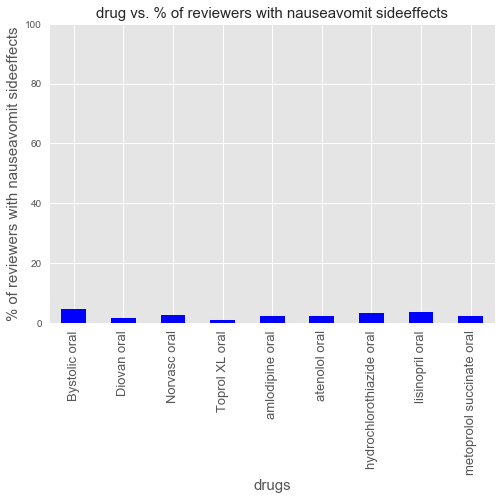

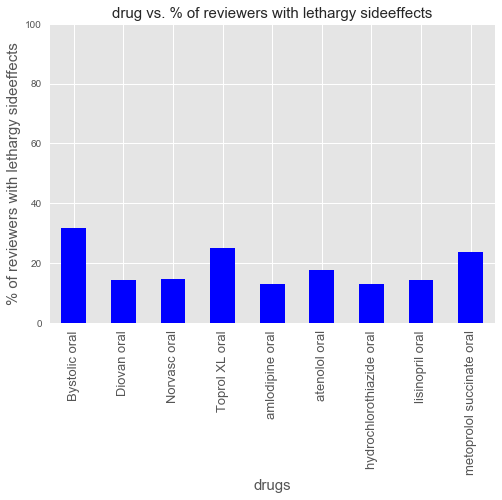

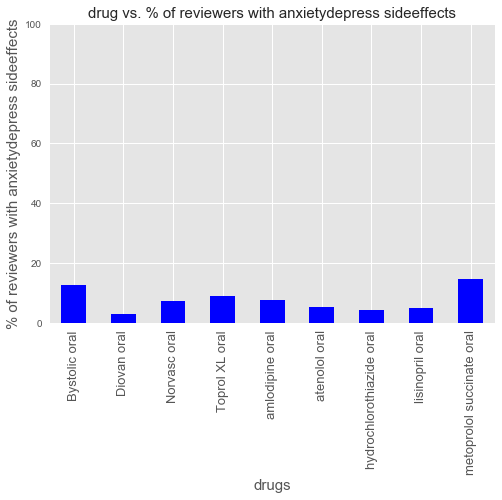

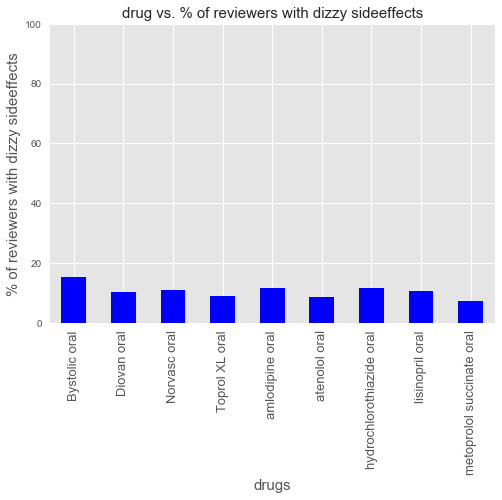

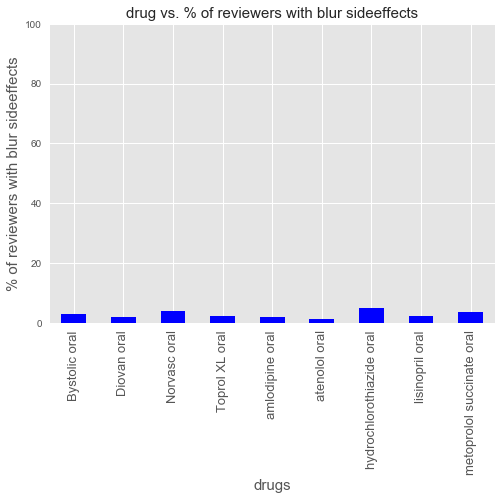

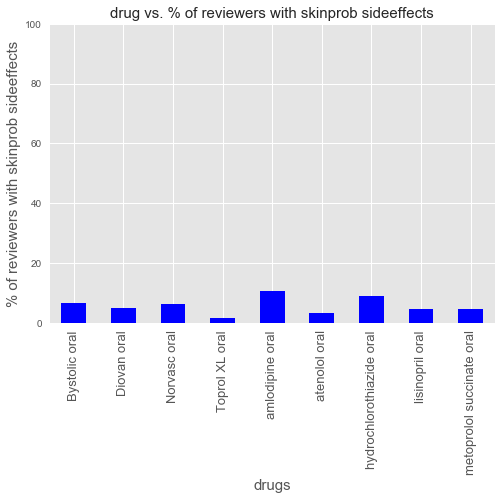

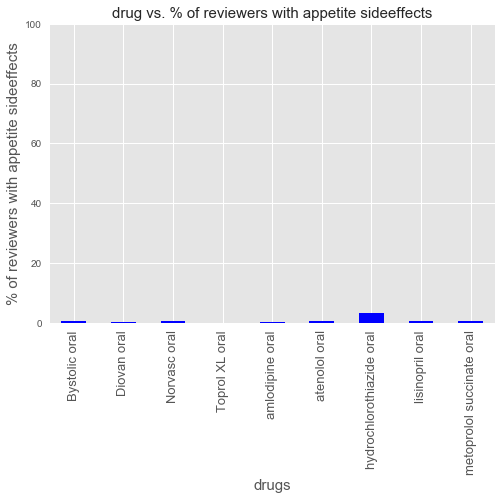

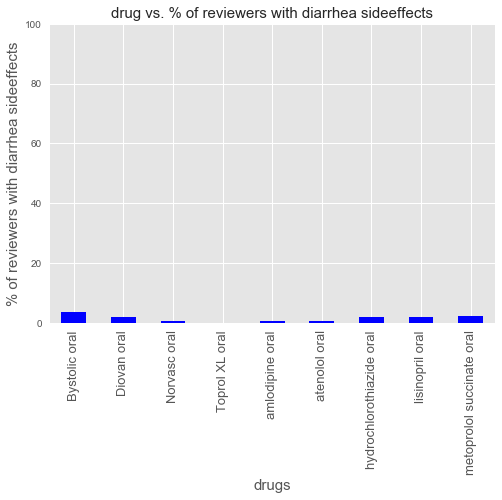

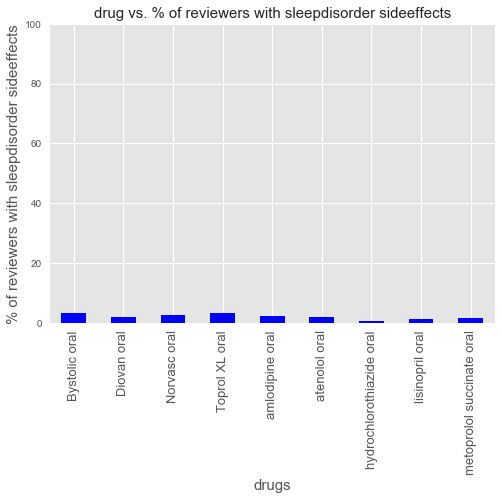

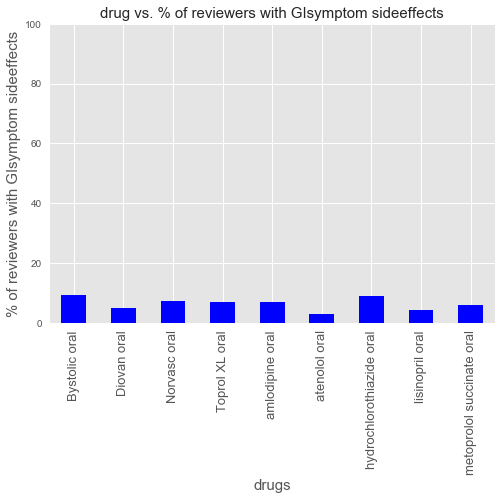

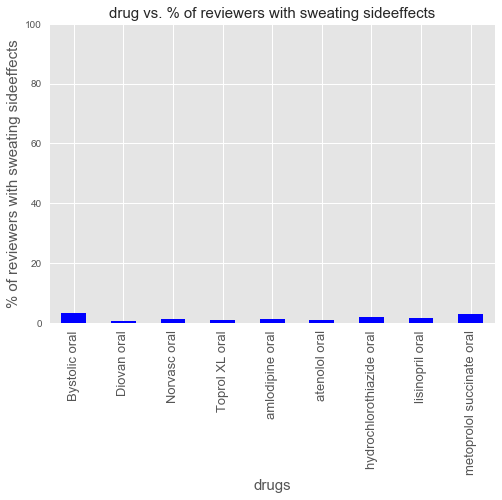

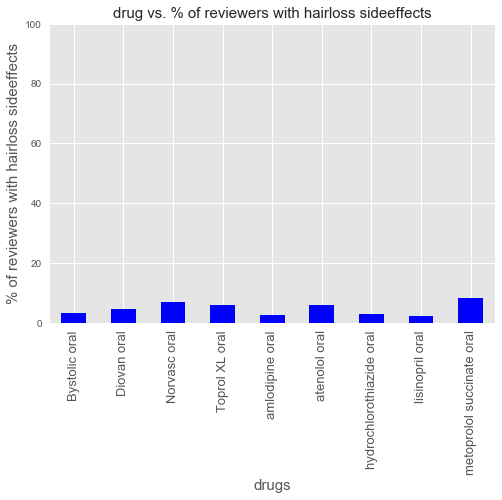

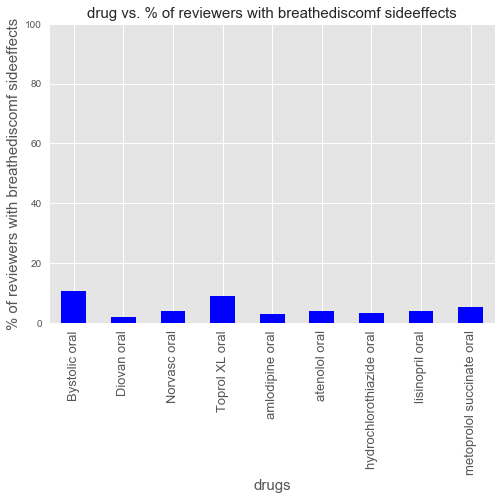

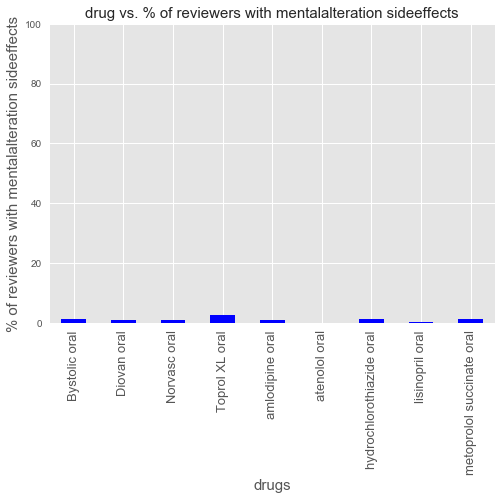

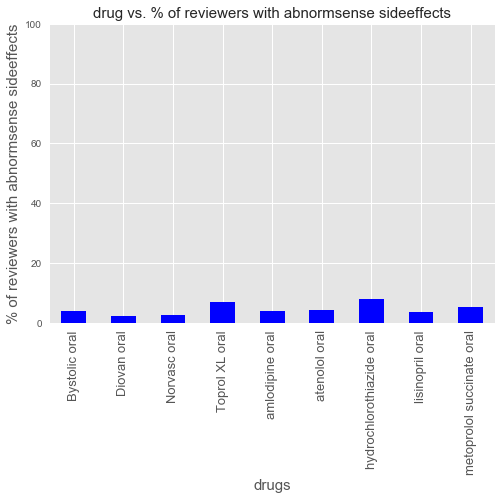

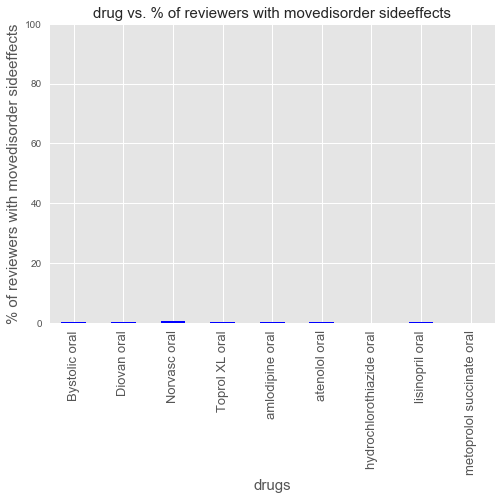

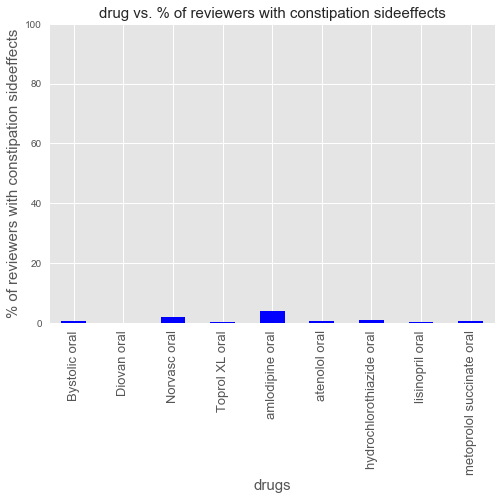

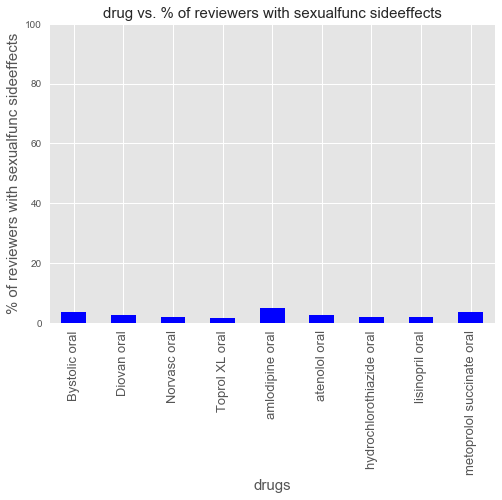

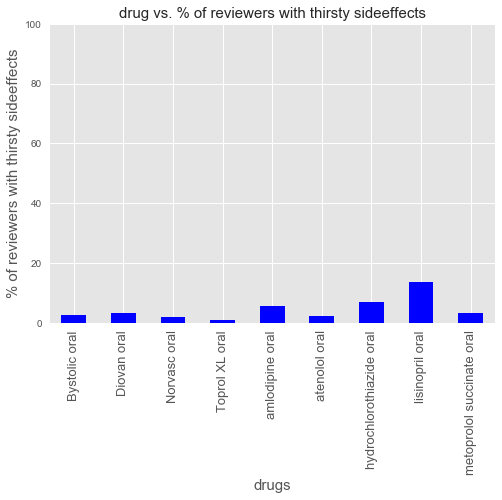

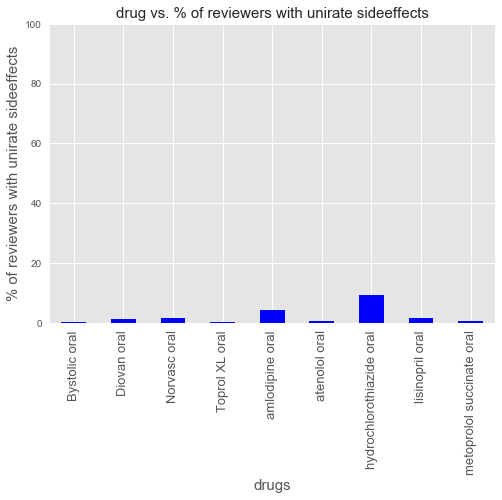

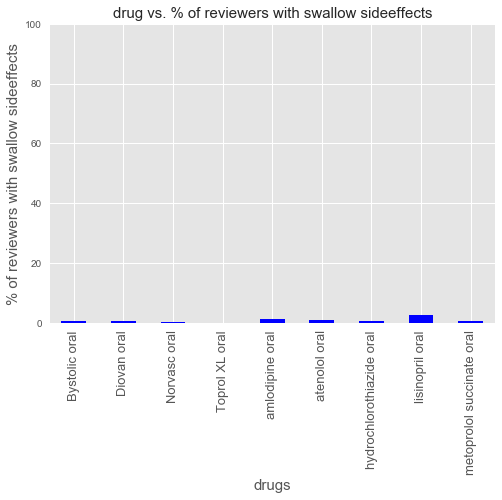

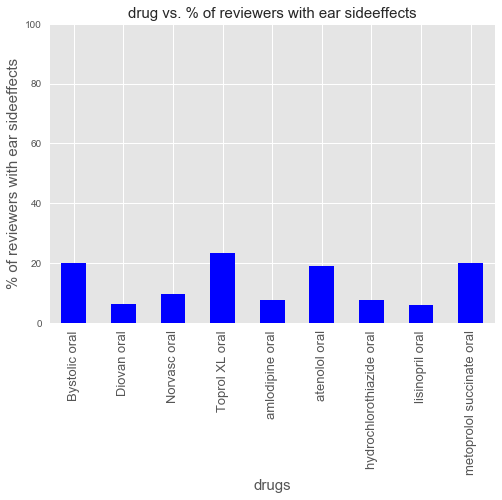

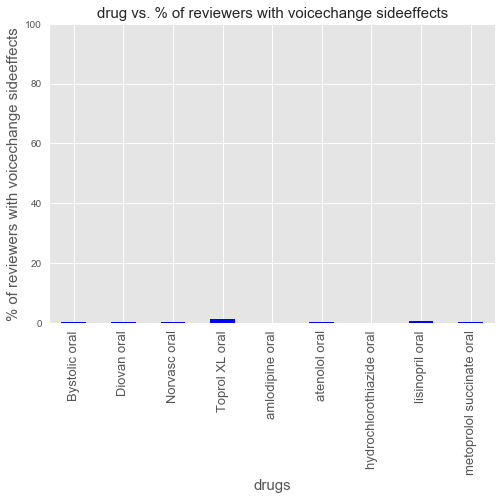

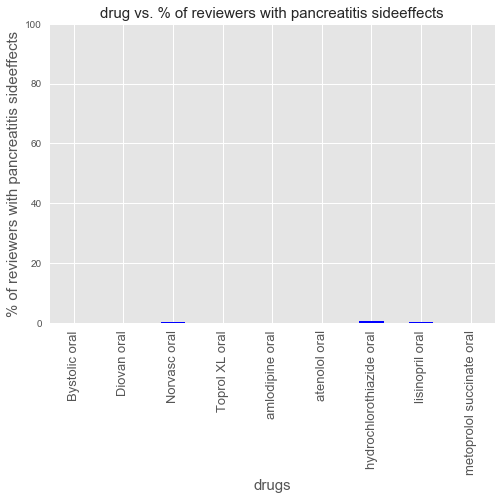

In [42]:
key_list = list( sideeffects.keys() )
for k_i in range(0,len(key_list)):
    plt.figure()
    (df.groupby('drugname')[key_list[k_i]].sum()/df.groupby('drugname')[key_list[k_i]].count()*100).plot.bar(color='b')
    plt.xlabel('drugs', fontsize=15)
    plt.ylabel('% of reviewers with {} sideeffects'.format(key_list[k_i]), fontsize=15)
    plt.ylim((0, 100))
    plt.title('drug vs. % of reviewers with {} sideeffects'.format(key_list[k_i]), fontsize=15)
    # plt.rcParams['xtick.labelsize']=13
    # plt.xticks(fontsize=13, rotation=45)
    plt.xticks(fontsize=13)
    # plot_.setp(boxplot_.get_xticklabels(), rotation=45)
    plt.show()
# labels = ax.get_xticklabels()
# plt.setp(labels, rotation=45, horizontalalignment='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

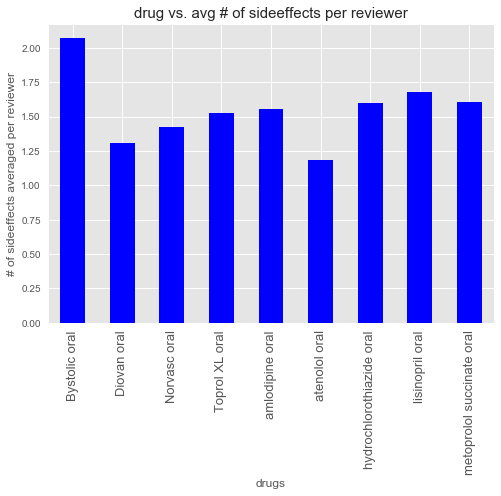

In [97]:
( df.groupby('drugname')['SEcount'].sum()/df.groupby('drugname')['easeofuse'].count() ).plot.bar(color='b')
plt.xlabel('drugs')
plt.ylabel('# of sideeffects averaged per reviewer')
plt.title('drug vs. avg # of sideeffects per reviewer', fontsize=15)
plt.xticks(fontsize=13, rotation=90)

In [ ]:
"""df[['SEcount','satisfaction']]
df.plot(kind='scatter',x='SEcount',y='satisfaction')
plt.ylabel('satisfaction(1~5)')
plt.xlabel('# of side effects per reviewer')"""

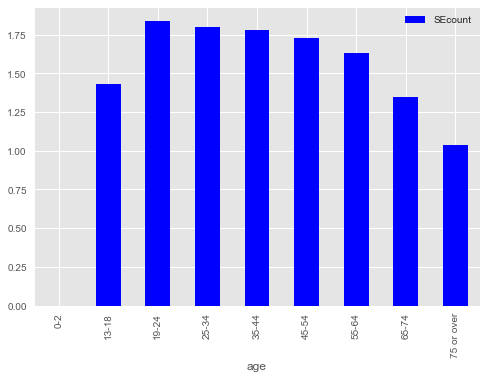

In [45]:
df[['age','SEcount']].groupby('age').mean().plot.bar(color='b')

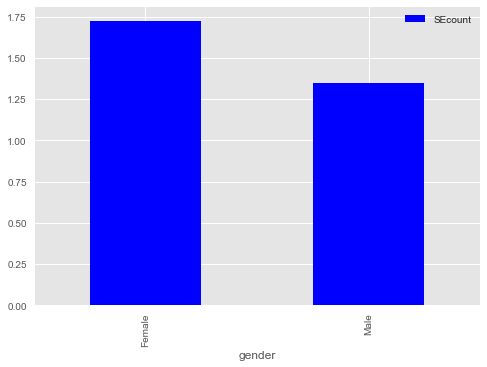

In [99]:
df[['gender', 'SEcount']].groupby('gender').mean().plot.bar(color='b')